The main idea of adding watermarkwith PIL library in Python is this：

(1) First create new empty image RGBA with the same size as original image but with transparent background (..., ..., ..., 0), e.g. 
a totally transparent black image (255,255,255,0).

(2) Next draw on this new image text with different transparency (e.g. 180 out of 255) and in different place. 

(3) Finally use Image.alpha_composite(original_image, text_image) to put text on image with expected transparency.


## 1. Put a watermark text in the center of an image

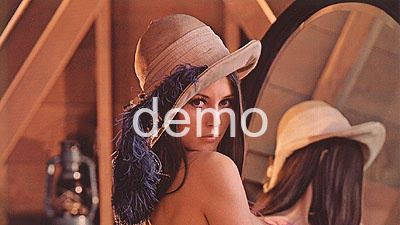

In [1]:
from PIL import Image, ImageDraw, ImageFont

watermark = 'demo'

# --- original image ---
original_image = Image.open('lena.png').convert("RGBA")
original_image_size = original_image.size

# --- watermarks image ---

# image with the same size and transparent color (..., ..., ..., 0)
watermarks_image = Image.new('RGBA', original_image_size, (255,255,255,0))

watermarks_draw = ImageDraw.Draw(watermarks_image)

font = ImageFont.truetype('arial.ttf', 55)

# calculate text size in pixels (width, height)
text_size = font.getsize(watermark) 

# calculate top/left corner for centered text
x = original_image_size[0]//2 - text_size[0]//2
y = original_image_size[1]//2 - text_size[1]//2

# draw text 
watermarks_draw.text((x, y), watermark, (255, 255, 255, 180), font=font)

# --- put watermarks image on original image ---
combined_image = Image.alpha_composite(original_image, watermarks_image)

# --- result ---
display(combined_image)
# save result to a new image
combined_image.save(f'lena_watermark_1.png')

## 2. Put multiple watermark texts in the center of an image

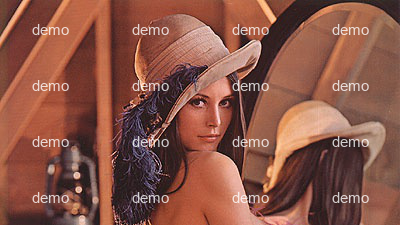

In [2]:
from PIL import Image, ImageDraw, ImageFont

watermark = 'demo'
# --- original image ---
original_image = Image.open('lena.png').convert("RGBA")
original_image_size = original_image.size

# --- watermarks image ---

# image with the same size and transparent color (..., ..., ..., 0)
watermarks_image = Image.new('RGBA', original_image_size, (255,255,255,0))

watermarks_draw = ImageDraw.Draw(watermarks_image)

font = ImageFont.truetype('arial.ttf', 15)

# calculate text size in pixels (width, height)
text_size = font.getsize(watermark) 

# calculate top/left corner for centered text
parts = 8
offset_x = original_image_size[0]//parts
offset_y = original_image_size[1]//parts

start_x = original_image_size[0]//parts - text_size[0]//2
start_y = original_image_size[1]//parts - text_size[1]//2

for a in range(0, parts, 2):
    for b in range(0, parts, 2):
        x = start_x + a*offset_x
        y = start_y + b*offset_y
        watermarks_draw.text((x, y), watermark, (255, 255, 255, 200), font=font)
        
# --- put watermarks image on original image ---

combined_image = Image.alpha_composite(original_image, watermarks_image)

# --- result ---

display(combined_image)
combined_image.save(f'lena_watermark_2.png')

## 3. Put a rotated watermark text in the center of an image

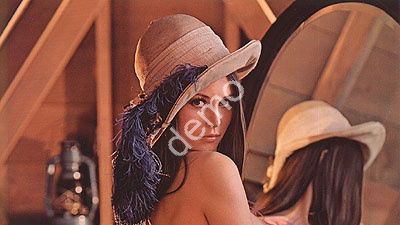

In [3]:
from PIL import Image, ImageDraw, ImageFont


watermark = 'demo'
# --- original image ---
original_image = Image.open('lena.png').convert("RGBA")
original_image_size = original_image.size

# --- text image ---

font = ImageFont.truetype('arial.ttf', 40)

# calculate text size in pixels (width, height)
text_size = font.getsize(watermark) 

# create image for text
text_image = Image.new('RGBA', text_size, (255,255,255,0))

text_draw = ImageDraw.Draw(text_image)

# draw text on image
text_draw.text((0, 0), watermark, (255, 255, 255, 129), font=font)

# rotate text image and fill with transparent color
rotated_text_image = text_image.rotate(45, expand=True, fillcolor=(0,0,0,0))

rotated_text_image_size = rotated_text_image.size

#rotated_text_image.show()

# --- watermarks image ---

# image with the same size and transparent color (..., ..., ..., 0)
watermarks_image = Image.new('RGBA', original_image_size, (255,255,255,0))

# calculate top/left corner for centered text
x = original_image_size[0]//2 - rotated_text_image_size[0]//2
y = original_image_size[1]//2 - rotated_text_image_size[1]//2

# put text on watermarks image
watermarks_image.paste(rotated_text_image, (x, y))

# --- put watermarks image on original image ---

combined_image = Image.alpha_composite(original_image, watermarks_image)

# --- result ---

display(combined_image)
combined_image.save(f'lena_watermark_3.png')

## 4. Put multiple rotated watermark text in the center of an image

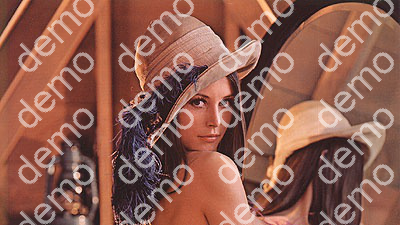

In [4]:
from PIL import Image, ImageDraw, ImageFont


watermark = 'demo'

# --- original image ---
original_image = Image.open('lena.png').convert("RGBA")
original_image_size = original_image.size

# --- text image ---

font = ImageFont.truetype('arial.ttf', 40)

# calculate text size in pixels (width, height)
text_size = font.getsize(watermark) 

# create image for text
text_image = Image.new('RGBA', text_size, (255,255,255,0))

text_draw = ImageDraw.Draw(text_image)

# draw text on image
text_draw.text((0, 0), watermark, (255, 255, 255, 129), font=font)

# rotate text image and fill with transparent color
rotated_text_image = text_image.rotate(45, expand=True, fillcolor=(0,0,0,0))

rotated_text_image_size = rotated_text_image.size

#rotated_text_image.show()

# --- watermarks image ---

combined_image = original_image

# calculate top/left corner for centered text
parts = 8
offset_x = original_image_size[0]//parts
offset_y = original_image_size[1]//parts

start_x = original_image_size[0]//parts - rotated_text_image_size[0]//2
start_y = original_image_size[1]//parts - rotated_text_image_size[1]//2

for a in range(0, parts, 2):
    for b in range(0, parts, 2):
        x = start_x + a*offset_x
        y = start_y + b*offset_y
        # image with the same size and transparent color (..., ..., ..., 0)
        watermarks_image = Image.new('RGBA', original_image_size, (255,255,255,0))
        # put text in expected place on watermarks image
        watermarks_image.paste(rotated_text_image, (x, y))
        # put watermarks image on original image
        combined_image = Image.alpha_composite(combined_image, watermarks_image)
        
#combined_image.show()

# --- result ---

display(combined_image)
combined_image.save(f'lena_watermark_4.png')